In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.dates import DateFormatter

In [2]:
datapath = 'data'
filename = 'SurfaceData_Cabauw_May2008.txt'

sfc_dat = pd.read_csv(os.path.join(datapath, filename), delimiter=r"\s+")

In [14]:
print(sfc_dat.head())

   year  month  day  hour   Press  Rain  SRad  NRad     H   LE     G  Ta002  \
0  2008      5    1  0.25  1003.3   0.0   0.0 -56.2 -35.9 -1.8 -13.2   7.53   
1  2008      5    1  0.75  1003.5   0.0   0.0 -58.1 -36.2  1.5 -13.0   7.77   
2  2008      5    1  1.25  1003.8   0.0   0.0 -57.4 -36.9 -1.2 -13.1   7.47   
3  2008      5    1  1.75  1004.0   0.0   0.0 -56.1 -33.9 -2.8 -13.1   6.93   
4  2008      5    1  2.25  1004.3   0.0   0.0 -58.1 -32.1 -5.0 -13.0   6.77   

   U010   D010  ust005   wT005  
0  4.96  170.0   0.239 -0.0288  
1  5.07  167.0   0.237 -0.0289  
2  4.86  168.0   0.257 -0.0295  
3  4.64  160.0   0.222 -0.0272  
4  4.53  167.0   0.227 -0.0258  


### Assignment 1

In [101]:
ds = pd.DataFrame(sfc_dat)
ds.index = pd.date_range('2008-05-01 00:15', periods=2*24*31,freq='0.5H')

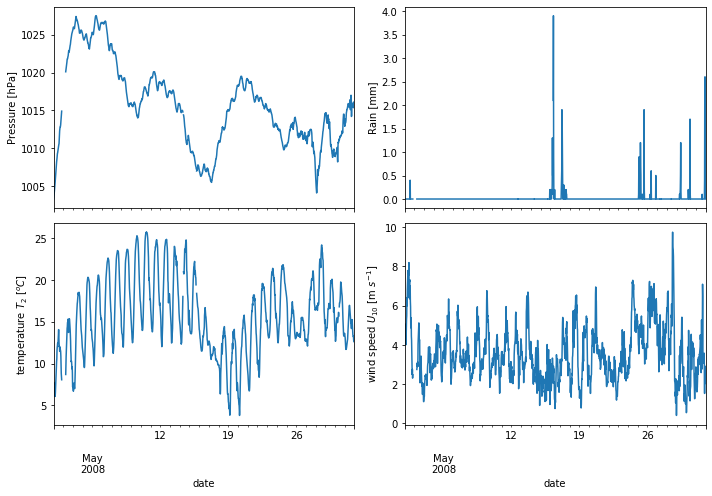

In [100]:
fig, axes = plt.subplots(2,2, sharex=True, figsize=(10,7))

ds.Press.plot(ax=axes[0,0])
ds.Rain.plot(ax=axes[0,1])
ds.Ta002.plot(ax=axes[1,0])
ds.U010.plot(ax=axes[1,1])

axes[0,0].set_ylabel('Pressure [hPa]')
axes[0,1].set_ylabel('Rain [mm]')
axes[1,0].set_ylabel('temperature $T_2$ [$^oC$]')
axes[1,1].set_ylabel('wind speed $U_{10}$ [m $s^{-1}$]')

axes[1,0].set_xlabel('date')
axes[1,1].set_xlabel('date')

fig.tight_layout()

1a) evolution of weather conditions: there was a pressure decrease at mid May, leading to a precipitation increase and a drop of temperature at 2m height.

1b) energy increase from early morning to midday, decrease again after midday.

In [16]:
tW = pd.DataFrame(sfc_dat[7*48:12*48])
tW.index = pd.date_range('2008-05-08 00:15', periods=2*24*5,freq='0.5H')

In [5]:
time = tW['hour']
nr = tW['NRad']
hf = tW['H']
le = tW['LE']
g = tW['G']

In [7]:
48*np.arange(5)

array([  0,  48,  96, 144, 192])

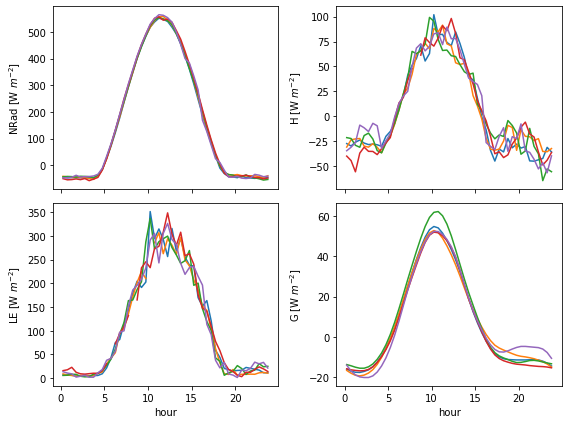

In [9]:
fig, axes = plt.subplots(2,2, sharex=True, figsize=(8,6))

for i in 48*np.arange(5):
    axes[0,0].plot(time[i:i+48], nr[i:i+48])
    axes[0,1].plot(time[i:i+48], hf[i:i+48])
    axes[1,0].plot(time[i:i+48], le[i:i+48])
    axes[1,1].plot(time[i:i+48], g[i:i+48])

axes[0,0].set_ylabel('NRad [W $m^{-2}$]')
axes[0,1].set_ylabel('H [W $m^{-2}$]')
axes[1,0].set_ylabel('LE [W $m^{-2}$]')
axes[1,1].set_ylabel('G [W $m^{-2}$]')
    
axes[1,0].set_xlabel('hour')
axes[1,1].set_xlabel('hour')

fig.tight_layout()

Text(0, 0.5, 'sensible heat flux H [W $m^{-2}$]')

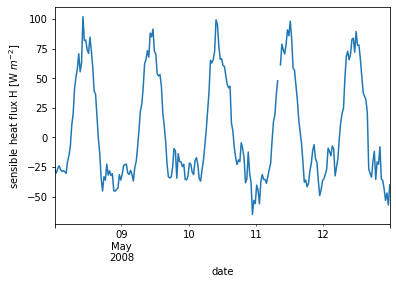

In [62]:
h = hf.plot()
h.set_xlabel('date')
h.set_ylabel('sensible heat flux H [W $m^{-2}$]')

Text(0, 0.5, 'latent heat flux LE [W $m^{-2}$]')

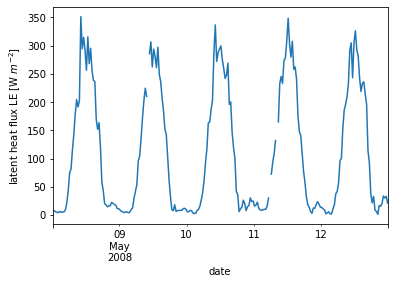

In [61]:
l = le.plot()
l.set_xlabel('date')
l.set_ylabel('latent heat flux LE [W $m^{-2}$]')

Text(0, 0.5, 'ground heat flux G [W $m^{-2}$]')

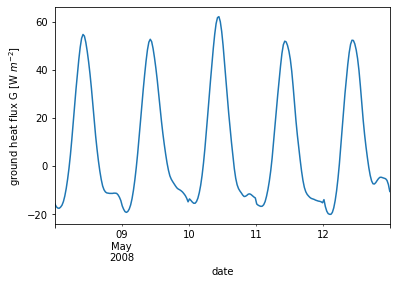

In [63]:
gh = g.plot()
gh.set_xlabel('date')
gh.set_ylabel('ground heat flux G [W $m^{-2}$]')

1c) Obukhov length

$L = -\frac{\theta u_*^3}{g k w\theta} = -\frac{Ta002*ust005^3}{0.4*g*wT005}$

impact of moisture flux on dynamic stability: important during day time;

less important at night?

In [24]:
timeWin['L'] = -timeWin['Ta002']*(timeWin['ust005']**3) / (0.4*9.81*timeWin['wT005'])

Text(0, 0.5, 'Obukhov length L [m]')

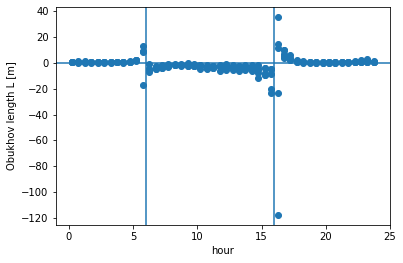

In [111]:
leng = timeWin['L']

fig,ax = plt.subplots()
ax.axhline(0)
ax.axvline(6)
ax.axvline(16)

plt.scatter(time,leng)
plt.xlabel('hour')
plt.ylabel('Obukhov length L [m]')

### Assignment 2

In [19]:
fric_vel = tW['ust005']
vel = tW['U010']

Text(0.5, 0, '$U_{10}$')

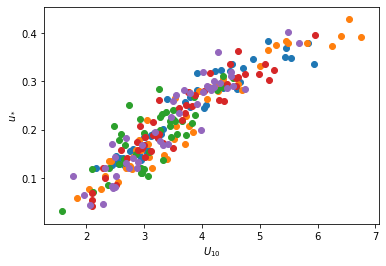

In [17]:
for i in 48*np.arange(5):
    plt.scatter(vel[i:i+48],fric_vel[i:i+48])

plt.ylabel('$u_*$')
plt.xlabel('$U_{10}$')

In [21]:
mask = ~np.isnan(vel) & ~np.isnan(fric_vel)
ss.linregress(vel[mask], fric_vel[mask])

LinregressResult(slope=0.08261094711336243, intercept=-0.0770721433363736, rvalue=0.9284864992707987, pvalue=1.2093211504037293e-102, stderr=0.002160013173474403)

a) linear correlated, ratio varies in time, showing a diurnal cycle, with a peak in midday.

Text(0, 0.5, '$u_*$ / $U_{10}$')

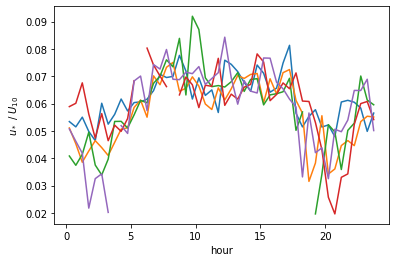

In [12]:
tW['vel_ratio'] = fric_vel / vel
vel_ratio = tW['vel_ratio']

for i in 48*np.arange(5):
    plt.plot(time[i:i+48],vel_ratio[i:i+48])
plt.xlabel('hour')
plt.ylabel('$u_*$ / $U_{10}$')

b) log wind profile

$u = \frac{u_*}{k} ln \frac{z}{z_0}$

$z_0 = \frac{z}{e^{\frac{ku}{u_*}}}$

$z_0 = \frac{10}{e^{\frac{0.4*U010}{ust005}}}$

In [16]:
tW['z0'] = 10/(np.e ** (0.4*tW['U010']/tW['ust005']))

In [26]:
z0 = tW['z0'].mean()
z0

0.01909726980622276

Text(0, 0.5, 'roughness length $z_0$ [m]')

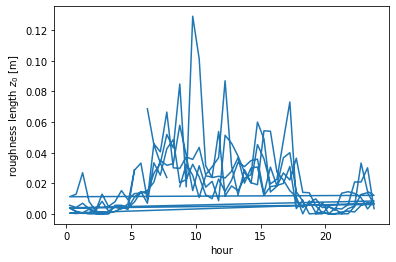

In [19]:
fig,ax = plt.subplots()
ax.plot(time, tW['z0'])
ax.set_xlabel('hour')
ax.set_ylabel('roughness length $z_0$ [m]')

Text(0, 0.5, 'roughness length $z_0$ [m]')

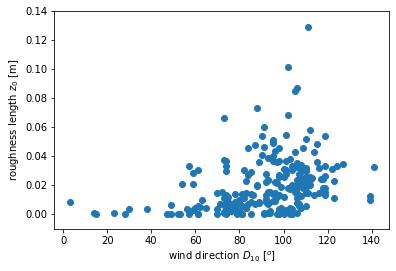

In [24]:
plt.scatter(tW.D010, tW.z0)
plt.ylim([-0.01,0.14])
plt.xlabel('wind direction $D_{10}$ [$^o$]')
plt.ylabel('roughness length $z_0$ [m]')

In [27]:
tW.D010.describe()

count    240.000000
mean      90.758333
std       21.659787
min        3.000000
25%       78.000000
50%       94.500000
75%      106.000000
max      141.000000
Name: D010, dtype: float64

In [32]:
d10 = tW.D010
d0_30 = tW[(d10 <= 30)]
d30_60 = tW[(d10 > 30) & (d10 <= 30)]
d60_90 = tW[(d10 > 60) & (d10 <= 90)]
d90_120 = tW[(d10 > 90) & (d10 <= 120)]
d120_150 = tW[(d10 > 120) & (d10 <= 150)]

Text(0, 0.5, 'mean $z_0$ [m]')

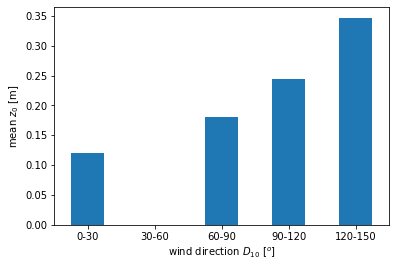

In [43]:
df = pd.DataFrame({
    'dir': ['0-30','30-60','60-90','90-120','120-150'],
    'mean': [d0_30.ust005.mean(),
             d30_60.ust005.mean(),
             d60_90.ust005.mean(),
             d90_120.ust005.mean(),
             d120_150.ust005.mean()]
})
ax = df.plot.bar(x='dir', y='mean', rot=0, legend=None)
ax.set_xlabel('wind direction $D_{10}$ [$^o$]')
ax.set_ylabel('mean $z_0$ [m]')

c) $z_0$ depends on wind directions. In this dataset the roughness length is small for small wind directions, suggesting smaller roughness elements in these directions.

### Assignment 3

In [44]:
f1 = 'RS_DeBilt_09May2008_00UTC.txt'
f2 = 'RS_DeBilt_09May2008_12UTC.txt'
f3 = 'RS_DeBilt_28May2008_00UTC.txt'
f4 = 'RS_DeBilt_28May2008_12UTC.txt'

ds1 = pd.DataFrame(pd.read_csv(os.path.join(datapath, f1), delimiter=r"\s+"))
ds2 = pd.DataFrame(pd.read_csv(os.path.join(datapath, f2), delimiter=r"\s+"))
ds3 = pd.DataFrame(pd.read_csv(os.path.join(datapath, f3), delimiter=r"\s+"))
ds4 = pd.DataFrame(pd.read_csv(os.path.join(datapath, f4), delimiter=r"\s+"))

In [85]:
ds_l = [ds1, ds2, ds3, ds4]
for ds in ds_l: 
    p = ds['press']
    T = ds['T'] + 273.15
    Td = ds['Td']
    p0 = 1013.25
    ds['theta'] = T * (p0/p)**0.286
    ds['e'] = 6.112 * np.exp(17.67*Td/(Td+234.5))
    e = ds['e']
    ds['q'] = 0.622*e/(p-0.378*e) 

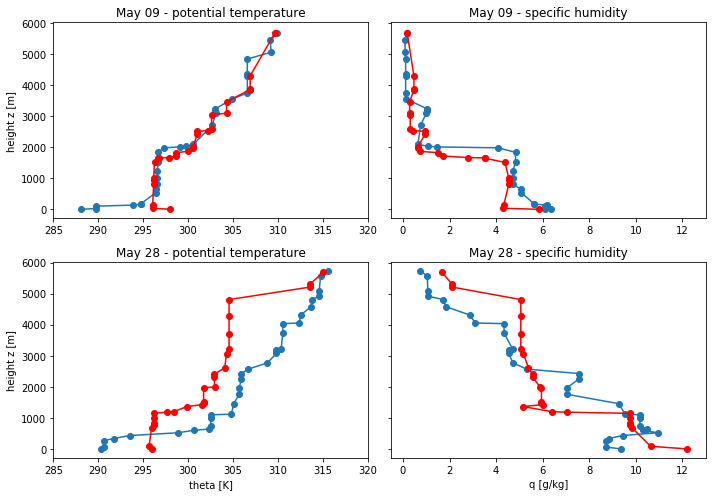

In [84]:
fig, axes = plt.subplots(2,2, sharey=True, figsize=(10,7))

axes[0,0].plot(ds1.theta.ffill(), ds1.z, '-o') 
axes[0,0].plot(ds2.theta.ffill(), ds2.z, '-o', color='r')
axes[0,0].set_xlim([285,320])
axes[1,0].set_xlim([285,320])
axes[1,0].plot(ds3.theta.ffill(), ds3.z, '-o') 
axes[1,0].plot(ds4.theta.ffill(), ds4.z, '-o', color='r')

axes[0,1].plot(1000*ds1.q.ffill(), ds1.z, '-o') 
axes[0,1].plot(1000*ds2.q.ffill(), ds2.z, '-o', color='r')
axes[0,1].set_xlim([-0.5,13])
axes[1,1].set_xlim([-0.5,13])
axes[1,1].plot(1000*ds3.q.ffill(), ds3.z, '-o') 
axes[1,1].plot(1000*ds4.q.ffill(), ds4.z, '-o', color='r')

axes[0,0].set_ylabel('height z [m]')
axes[1,0].set_ylabel('height z [m]')

axes[1,0].set_xlabel('theta [K]')
axes[1,1].set_xlabel('q [g/kg]')

axes[0,0].set_title('May 09 - potential temperature')
axes[1,0].set_title('May 28 - potential temperature')
axes[0,1].set_title('May 09 - specific humidity')
axes[1,1].set_title('May 28 - specific humidity')

fig.tight_layout()

### Assignment 4

compare model and data using double log spectra

In [3]:
f5 = 'SpectralDensities_Cabauw_09May2008_05-06UTC.txt'
ds5 = pd.DataFrame(pd.read_csv(os.path.join(datapath, f5), delimiter=r"\s+"))

a) numerical computation of S_u,v,w

In [4]:
ds5.head()

,freq,Su,Sv,Sw
0,0.00025,11.227697,2.111330,0.291096
1,0.00051,11.223277,2.171312,0.289653
2,0.00076,11.019268,2.158442,0.289536
3,0.00102,11.000275,2.169687,0.289003
4,0.00127,11.017084,2.169869,0.287482


##### 

In [35]:
ds5['dif_freq'] = ds5.freq.diff()

ds5['Su_sum'] = ds5.Su.rolling(2).sum()
ds5['Sv_sum'] = ds5.Sv.rolling(2).sum()
ds5['Sw_sum'] = ds5.Sw.rolling(2).sum()

In [5]:
ds5['fSu'] = ds5.freq * ds5.Su
ds5['fSv'] = ds5.freq * ds5.Sv
ds5['fSw'] = ds5.freq * ds5.Sw

In [7]:
Su = ds5.fSu.sum() /2
Sv = ds5.fSv.sum() /2
Sw = ds5.fSw.sum() /2
print(Su, Sv, Sw)

3.269050059207 1.7934458727519997 0.7487182182095


bar_u = 2.82
u_star = 0.22
z_div_L = 0.07
z = 5

In [8]:
ds5['y_u'] = ds5.fSu / (0.22**2)
ds5['y_v'] = ds5.fSv / (0.22**2)
ds5['y_w'] = ds5.fSw / (0.22**2)
ds5['n'] = ds5.freq * 5/2.82

In [48]:
ds5['u_ole'] =  79*ds5.n /(1 + 263* ds5.n **(5/3))
ds5['v_ole'] =  13*ds5.n /(1 +  32* ds5.n **(5/3))
ds5['w_ole'] = 2.5*ds5.n /(1 + 8.6* ds5.n **(5/3))

In [53]:
ds5['v/u'] = ds5.Sv / ds5.Su
ds5['w/u'] = ds5.Sw / ds5.Su

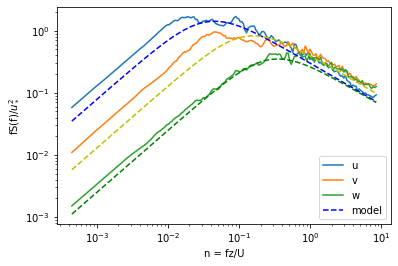

In [52]:
plt.plot(ds5.n, ds5.y_u)
plt.plot(ds5.n, ds5.y_v)
plt.plot(ds5.n, ds5.y_w)

plt.plot(ds5.n, ds5.u_ole,'b--')
plt.plot(ds5.n, ds5.v_ole,'y--')
plt.plot(ds5.n, ds5.w_ole,'g--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('n = fz/U')
plt.ylabel('fS(f)/$u_*^2$')
plt.legend(['u','v','w','model'])

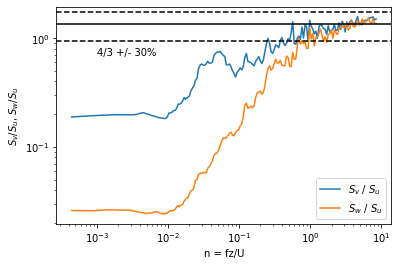

In [85]:
plt.plot(ds5.n, ds5['v/u'])
plt.plot(ds5.n, ds5['w/u'])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('n = fz/U')
plt.ylabel('$S_v$/$S_u$, $S_w$/$S_u$')
plt.legend(['$S_v$ / $S_u$','$S_w$ / $S_u$'])

high = 4/3*1.3
low = 4/3*0.7
plt.annotate('4/3 +/- 30%',xy=(0.001,0.7))
plt.axhline(4/3,c='k')
plt.axhline(high,c='k',ls='--')
plt.axhline(low,c='k',ls='--')

$\alpha_u$ = 0.55

$\alpha_v$ = $\alpha_w$ = 0.55*4/3

bar_u = 2.82

In [10]:
ds5['ep_u'] = 2*np.pi/2.82 * (ds5.freq)**(5/2) * (ds5.Su/0.55)**(3/2)
ds5['ep_v'] = 2*np.pi/2.82 * (ds5.freq)**(5/2) * (ds5.Sv/0.73)**(3/2)
ds5['ep_w'] = 2*np.pi/2.82 * (ds5.freq)**(5/2) * (ds5.Sw/0.73)**(3/2)

In [11]:
ds5.head()

,freq,Su,Sv,Sw,fSu,fSv,fSw,y_u,y_v,y_w,n,ep_u,ep_v,ep_w
0,0.00025,11.227697,2.111330,0.291096,0.002807,0.000528,0.000073,0.057994,0.010906,0.001504,0.000443,2.030826e-07,1.083006e-08,5.544353e-10
1,0.00051,11.223277,2.171312,0.289653,0.005724,0.001107,0.000148,0.118262,0.022880,0.003052,0.000904,1.206401e-06,6.713597e-08,3.271063e-09
2,0.00076,11.019268,2.158442,0.289536,0.008375,0.001640,0.000220,0.173030,0.033893,0.004546,0.001348,3.181631e-06,1.803811e-07,8.862052e-09
3,0.00102,11.000275,2.169687,0.289003,0.011220,0.002213,0.000295,0.231824,0.045725,0.006091,0.001809,6.622050e-06,3.793521e-07,1.844168e-08
4,0.00127,11.017084,2.169869,0.287482,0.013992,0.002756,0.000365,0.289085,0.056937,0.007543,0.002252,1.148143e-05,6.563055e-07,3.164986e-08


In [12]:
print(ds5[ds5.n>=1].ep_u.mean())
print(ds5[ds5.n>=1].ep_v.mean())
print(ds5[ds5.n>=1].ep_w.mean())

0.007146199709480473
0.007024210814950926
0.006234728076677623
